<a href="https://colab.research.google.com/github/tsvoronos/API202-students/blob/main/API_202_ReviewSession1_MD_Answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# API-202 Review Session #1
**Friday, January 27**

TF: Matthew Dodier

# Table of Contents
1. [Lecture Recap](#Lecture-Recap)
2. [Exercises](#Exercises)
2. [Appendix](#Appendix)

# Lecture Recap

* Bivariate regression: a simple analytical tool to quantify the relation between any two numeric variables. We' ll be able to describe:
  1. The **direction** of the relation;
  2. The **magnitude** of the relation;
  3. Our **confidence in the statistical significance** of the relation.

## Bivariate Regression

* Suppose we want to know the relationship (association) between class size and test scores (at the school district level)?
* Assume we have data for each school district, thus we have:
  * A mean test score that will be our outcome Y 
  * A class size measure (student-teacher ratio) that will be our treatment X
____________________  

## What Questions Might We Answer?
Some questions these data might answer:
  * *On average, what is the association between test scores and student-teacher ratio?*
  * *What is the predicted change in test score associated with an increase in the student-teacher ratio?*
____________________

## How Do We Answer These Questions? 
* Ordinary Least Squares (OLS) regression analysis will identify the **line** that **best fits** the data.
  * OLS chooses the line that *minimizes* the sum of squared residuals

$$
\hat{Y}_i=\hat{\beta}_0+\hat{\beta}_1 * X_i
$$

by 

$$
\min \sum_i \hat{u}_i^2=\min \sum_i\left(Y_i-\hat{Y}_i\right)^2
$$

* Two interpretation notes:
  1. Our line of best fit tells us the expected or predicted value of outcome Y given a value of X.	
  2. The best fit line is an average value, not an actual value for an individual.

## Step Back: Theorize for Population…


* Bivariate regression assumes a linear relationship between two variables. The **population regression function** (PRF) is written:

  $$
  Y_i=\beta_0+\beta_1 * X_i+\mu_i
  $$

  * $Y_i$ : Dependent variable, LHS variable
  * $\beta_0$ : Constant, intercept (*value of $Y$ when $X$ is 0*)
  * $\beta_1$ : Slope, coefficient of interest (*change in $Y$ associated with a one-unit increase in $X$*)
  * $X_i$ : Independent variable, RHS variable, explanatory variable, covariate regressor
  * $\mu_i$ : Residual, error term (*all the variation in $Y$ not explained by $X$*)

* This simple theoretical model is what we expect to hold in our population of reference. How we think the world works


## …and Estimate in a Sample
* When we actually estimate the coefficients on a sample, the sample regression function (SRF) is written: 

$$Y_i=\hat{\beta}_0+\hat{\beta}_1 * X_i+\hat{\mu_i}$$

* The OLS line of best fit chooses values of the slope ($\beta_1$) and intercept ($\beta_0$) that minimize the sum of the squared residuals in the sample at hand.

$$
\hat{Y}_i=\hat{\beta}_0+\hat{\beta}_1 X_i
$$

* The difference between the line of best fit and a person's actual $Y$ is reflected in his or her residual $\left(\hat{\mu_i}=Y_i-\hat{Y_i}\right)$.


## Estimate Interpretation

* What is the meaning of $\beta_1$? How does it relate $Y$ to $X$?

The slope coefficient $\beta_1$ tells us the average change in $Y$ associated with a one-unit change in $X$. 


* Note: $\beta_1$ has the *same sign* as the *correlation* between $X$ and $Y$.

The constant (or Y-intercept) $\beta_0$ tells us the predicted value of $Y$ for individuals with $X=0$.

## Making Inferences i.e., Hypothesis Testing
* With data samples, we can construct our best guess for the line of best fit for the population. We try to get at the theory put forth.
* We denote the true population coefficients as $\beta$ and our estimated coefficients from the sample as $\hat{\beta}$.
* Statistical inference quantifies the effect of sampling fluctuation, meaning we want to know how likely it is that $\hat{\beta}$ is close to $\beta$.
* When we reject the null hypothesis $H_0: \beta_1=0$ at the $5 \%$ level, we say that $\beta_1$ is statistically significant. This phrase implies that we have strong evidence of a significant relationship between $X$ and $Y$. 
  * This does not, however, necessarily imply that $X$ causes $Y$!

## Takeaways
* Bivariate regression helps us establish the direction and measure the magnitude of the relationship between two variables.
* Hypothesis testing and confidence intervals help us measure how certain we are about the magnitude in the population.
* If we reject the null hypothesis $H_0$: $\beta_1 = 0$ at the $5 \%$ level, we say:
  * "$X$ is statistically significantly associated with $Y$."
* For reasons we will explore more in future lectures, this is not the same as:
  * "$X$ causes $Y$."

# Exercises

The purpose of these exercises is to help you learn the basic mechanics of ordinary least squares (OLS) regression in R including reading summaries of regression results and hypothesis testing. We will also do data visualization using the ggplot2 package.

In [ ]:
#suppress warnings
options(warn =-1,dplyr.summarise.inform=FALSE)

#load packages
library(tidyverse)
library(broom)

#load data
data(mtcars)

head(mtcars)
glimpse(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


Rows: 32
Columns: 11
$ mpg  <dbl> 21.0, 21.0, 22.8, 21.4, 18.7, 18.1, 14.3, 24.4, 22.8, 19.2, 17.8,…
$ cyl  <dbl> 6, 6, 4, 6, 8, 6, 8, 4, 4, 6, 6, 8, 8, 8, 8, 8, 8, 4, 4, 4, 4, 8,…
$ disp <dbl> 160.0, 160.0, 108.0, 258.0, 360.0, 225.0, 360.0, 146.7, 140.8, 16…
$ hp   <dbl> 110, 110, 93, 110, 175, 105, 245, 62, 95, 123, 123, 180, 180, 180…
$ drat <dbl> 3.90, 3.90, 3.85, 3.08, 3.15, 2.76, 3.21, 3.69, 3.92, 3.92, 3.92,…
$ wt   <dbl> 2.620, 2.875, 2.320, 3.215, 3.440, 3.460, 3.570, 3.190, 3.150, 3.…
$ qsec <dbl> 16.46, 17.02, 18.61, 19.44, 17.02, 20.22, 15.84, 20.00, 22.90, 18…
$ vs   <dbl> 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,…
$ am   <dbl> 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,…
$ gear <dbl> 4, 4, 4, 3, 3, 3, 3, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 4, 4, 4, 3, 3,…
$ carb <dbl> 4, 4, 1, 1, 2, 1, 4, 2, 2, 4, 4, 3, 3, 3, 4, 4, 4, 1, 2, 1, 1, 2,…


This dataset includes cars in the 1974 issue of Motor Trend magazine. We want to look at the relationship between weight and miles per gallon per gallon.

**a. Let's start by visualizing the data with a scatterplot. Put miles per gallon on the y-axis and weight on the x-axis.**

* ggplot2 is a package within tidyverse for creating graphics.
  * Must supply a data and aesthetics.
  * Always start with something like ggplot(data, aes(x = var1, y = var2, color = var3, ...))
  * Aesthetics map variables in your data to x/y positions, colors, line types, groups, and more.
* Add geometries like geom_histogram(), geom_point(), geom_line(), geom_abline() , and more with +.
* Label axes with labs().

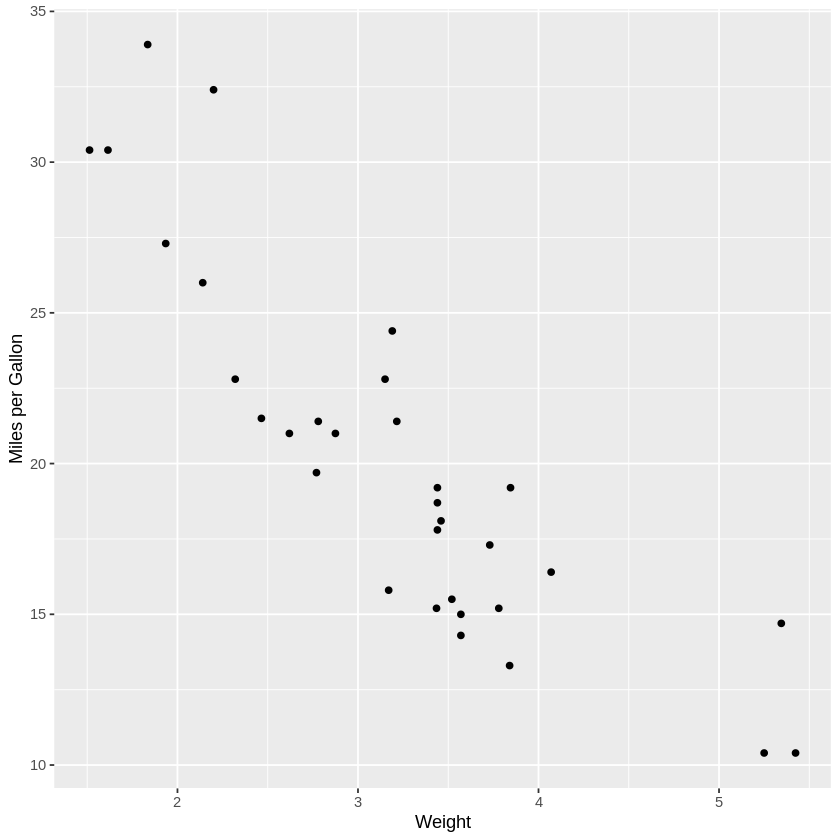

In [ ]:
# Your answer here!

# Start

# geom_point() requires x and y aesthetics
ggplot(mtcars, aes(x = wt, y = mpg)) + geom_point() +
labs(x = "Weight", y = "Miles per Gallon")
# End


**b. Run a linear regression of miles per gallon (mpg) on weight (wt). From the summary R output, what do $\hat{\beta_0}$ and $\hat{\beta_1}$ equal?**

In [ ]:
# Your code here

# Start
m1 <- lm(mpg ~ wt, mtcars)
summary(m1)

tidy(m1)
# End


Call:
lm(formula = mpg ~ wt, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5432 -2.3647 -0.1252  1.4096  6.8727 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  37.2851     1.8776  19.858  < 2e-16 ***
wt           -5.3445     0.5591  -9.559 1.29e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.046 on 30 degrees of freedom
Multiple R-squared:  0.7528,	Adjusted R-squared:  0.7446 
F-statistic: 91.38 on 1 and 30 DF,  p-value: 1.294e-10


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),37.285126,1.877627,19.857575,8.241799e-19
wt,-5.344472,0.559101,-9.559044,1.293959e-10


#### Your answer here

#### Start
$$\beta_0 = 37.2851$$
$$\beta_1 = -5.3445$$
#### End

**c. Interpret the coefficient on weight.  Also, consider the hypothesis $H_0: \beta_1 = 0$ in the context of the above regression.  Would you reject this hypothesis at the $5 \%$ significance level?  Explain.**

#### Your answer here

#### Start
A 1000 pound increase in car weight is associated with a 5.3 fewer miles per gallon on average. The standard error of this estimate is approximately 0.56, giving a t-statistic value of -9.6. This is much greater in absolute value than the critical value of 1.96, so we reject the null hypothesis at the $5 \%$ level.
#### End


**d. Now that we have some evidence about the relationship between miles per gallon and weight, let's go back to our scatterplot and add a line that captures this relationship. Again, put miles per gallon on the y-axis and weight on the x-axis.**

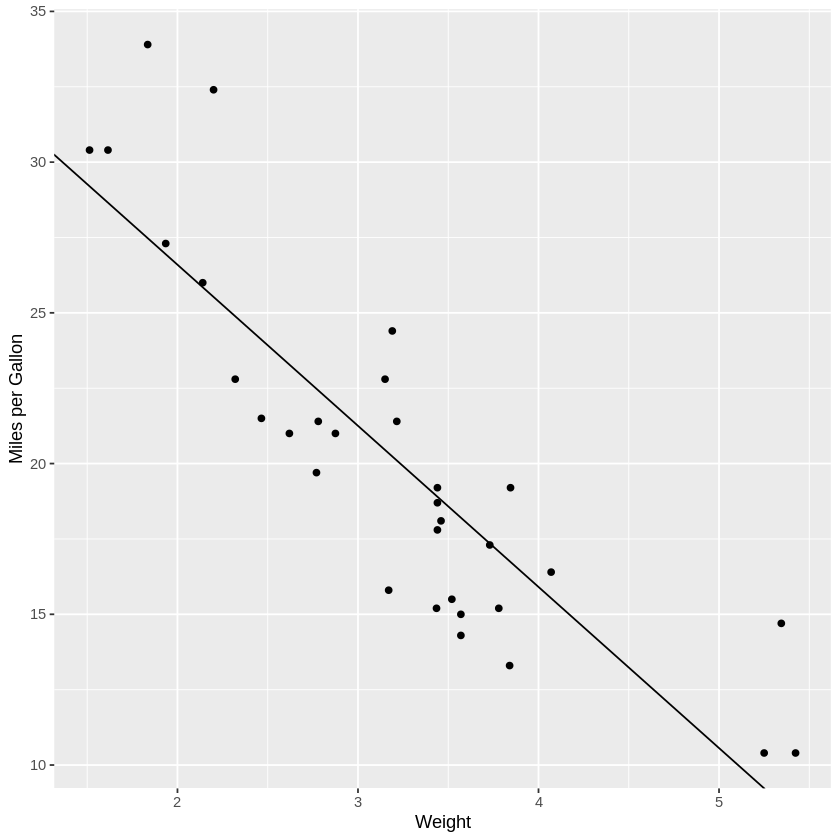

In [ ]:
# Your answer here!

# Start

# geom_point() requires x and y aesthetics
ggplot(mtcars, aes(x = wt, y = mpg)) + geom_point() +
labs(x = "Weight", y = "Miles per Gallon") + 
geom_abline(intercept = coef(m1)[1], slope = coef(m1)[2])
# End


**e. This dataset contains information on whether a car model has a manual or automatic transmission. How could we adjust our scatterplot to differentiate between data points of automatic and manual transmission cars?**

Hint: Within the aes() function of your gpplot command, you can add
group=am to separate out the scatter plot into the different groups represented by transmission type.

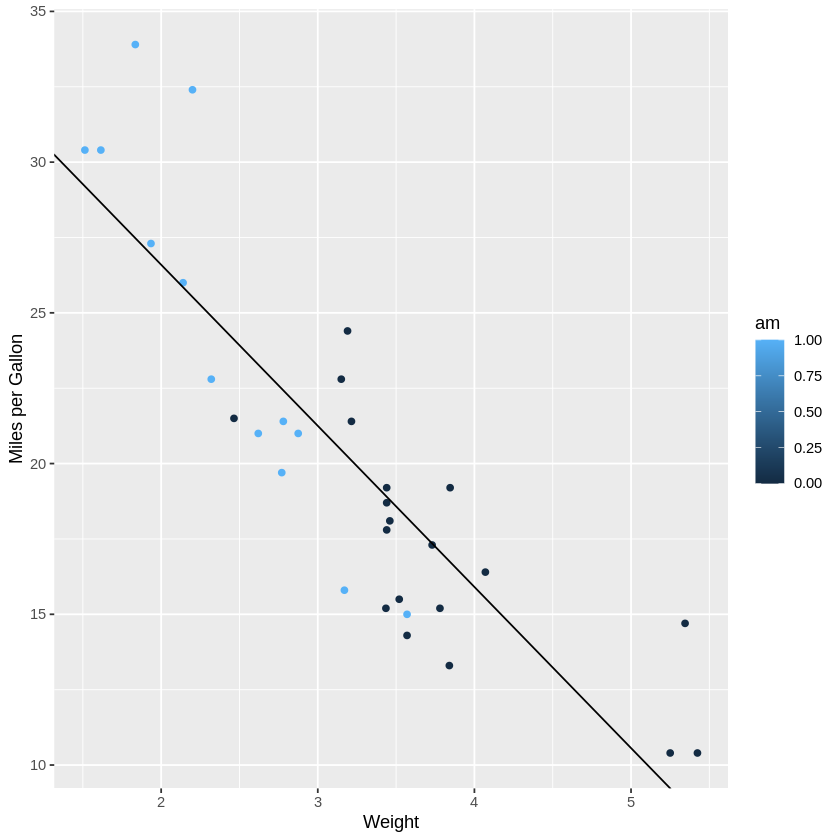

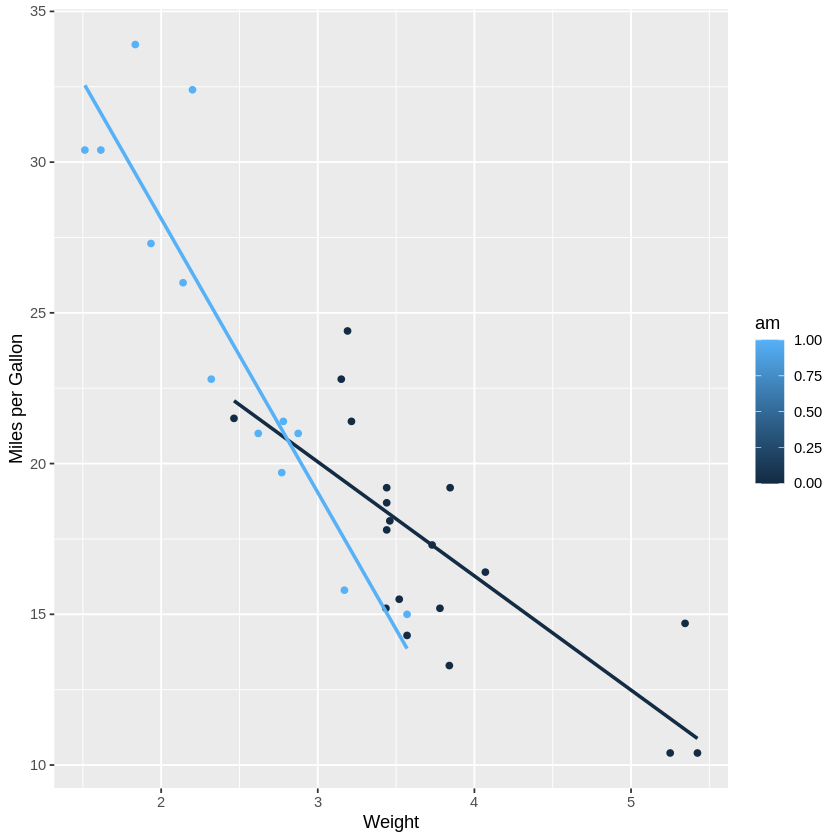

In [ ]:
# Your answer here!

# START

# geom_point() requires x and y aesthetics
ggplot(mtcars, aes(x = wt, y = mpg, group=am, colour=am)) + 
geom_point() +
labs(x = "Weight", y = "Miles per Gallon") + 
geom_abline(intercept = coef(m1)[1], slope = coef(m1)[2])
# END

# START
ggplot(mtcars, aes(x = wt, y = mpg, group=am, colour=am)) + 
geom_point() +
labs(x = "Weight", y = "Miles per Gallon") +
geom_smooth(method = "lm", se = F,formula=y~x)
# END


# Appendix

## Hypothesis Testing: Technical Recap
1. State null hypothesis, $H_0 \quad \left(H_0: \beta_1=a\right)($ Usually, $a=0)$
2. Set a significance level, $\alpha \quad(\alpha=0.05)$
3. Calculate sample coefficient (estimate), $\hat{\beta}_1$
4. Calculate standard error, $S E\left(\hat{\beta}_1\right)$
5. Calculate t-statistic, $t=\frac{\widehat{\beta}_1-a}{S E\left(\widehat{\beta}_1\right)}$
  * In large samples, t-stat follows standard normal distribution. We compare $|t|$ to 1.96.
6. Calculate p-value (If $H_0$ were true, what is probability of a sample giving $\hat{\beta_1}$ at least as far away from $a$ as the one observed?)
  * p-value is the probability of observing a sample estimate ($\widehat{\beta_1}$) (or further away) if the null hypothesis is true in the population.
  * Alternatively: probability our estimate ($\widehat{\beta_1}$) is due to chance. We compare p-value to 0.05.
7.  We can construct a 95% *confidence interval* as:
$$
\left[\widehat{\beta_1}-1.96 * \text { Standard Error, } \widehat{\beta_1}+1.96 * \text { Standard Error }\right]
$$
  * Statistical interpretation: 95% of intervals constructed in this way from different samples will contain the true slope value.
8. Perform the test: Reject $H_0$ if p-value $< \alpha$; else fail to reject
(With $\alpha = 0.05$, reject $H_0$ if $|t| > 1.96$, if p-value $< 0.05$, or if the 95% confidence interval does not contain a)
